## Aggregateing and Plotting average ratings by 'Day'/'Week'/'Month'

In [1]:
#'Esc and A' create a shell above the existing shell.
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data=pandas.read_csv("reviews.csv",parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by 'Day'

In [2]:
data['Day']=data['Timestamp'].dt.date
#to aggregate i used mean.
day_average = data.groupby(['Day']).mean()
day_average
#for average use 'mean()' and for all columns use 'count()'
#There is only seven in the comment section because the pandas doesnt count nan value in the dataframe.

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


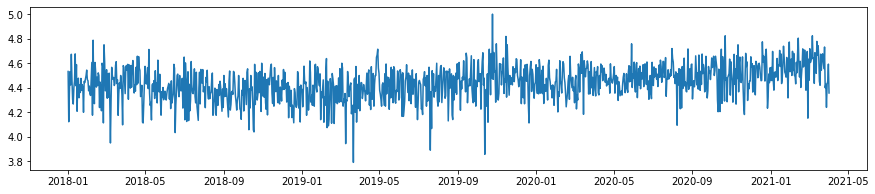

In [3]:
plt.figure(figsize=(15,3))
plt.plot(day_average.index,day_average['Rating'])

### Rating average/count by 'Week'

In [4]:
data['Week']=data['Timestamp'].dt.strftime('%Y - %U')
#this is giving the aggregated data of week so we will use 'strftime' which means sting from time it seems.
#dt.isocalendar().week is changed into strftime.
#strftime('%Y - %U') %U is week. and you chane year %Y to month %m if you want.
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018 - 00,4.434564
2018 - 01,4.424933
2018 - 02,4.417702
2018 - 03,4.401024
2018 - 04,4.468085
...,...
2021 - 09,4.560096
2021 - 10,4.627315
2021 - 11,4.629121


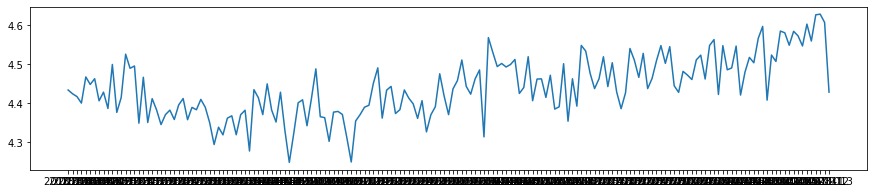

In [5]:
#plt.plot(x,y)x=week_average.index y=week_average['Rating']
plt.figure(figsize=(15, 3))
plt.plot(week_average.index,week_average['Rating'])
#the x seems to be smashed up with the data 
#so if you want to fix it you can do it in more modern lib like 'highcharts'

In [6]:
#the graph is visibly good in this one than the day average plot so that is the power of 'downsampling' the data.

### Rating average/count by 'Month'

In [7]:
data['Month']=data['Timestamp'].dt.strftime('%Y - %m')
month_average = data.groupby(['Month']).mean()
month_average

,Rating
Month,
2018 - 01,4.429645
2018 - 02,4.436248
2018 - 03,4.421671
2018 - 04,4.468211
2018 - 05,4.396420
2018 - 06,4.375379
2018 - 07,4.393184
2018 - 08,4.344753
2018 - 09,4.347247


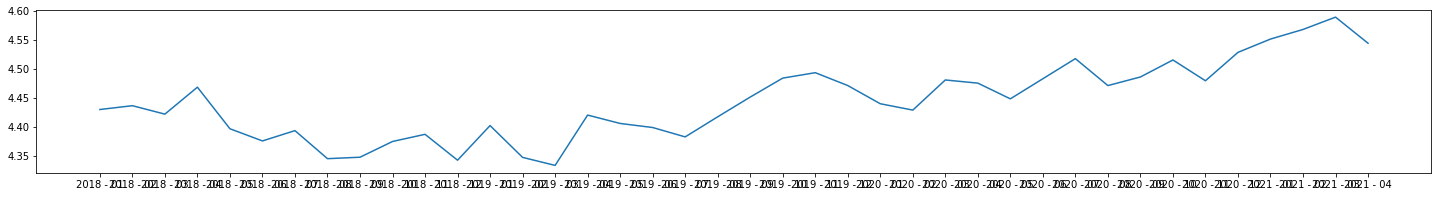

In [8]:
plt.figure(figsize=(25, 3))
plt.plot(month_average.index,month_average['Rating'])

### Average rating by month by course.

<AxesSubplot:xlabel='Month'>

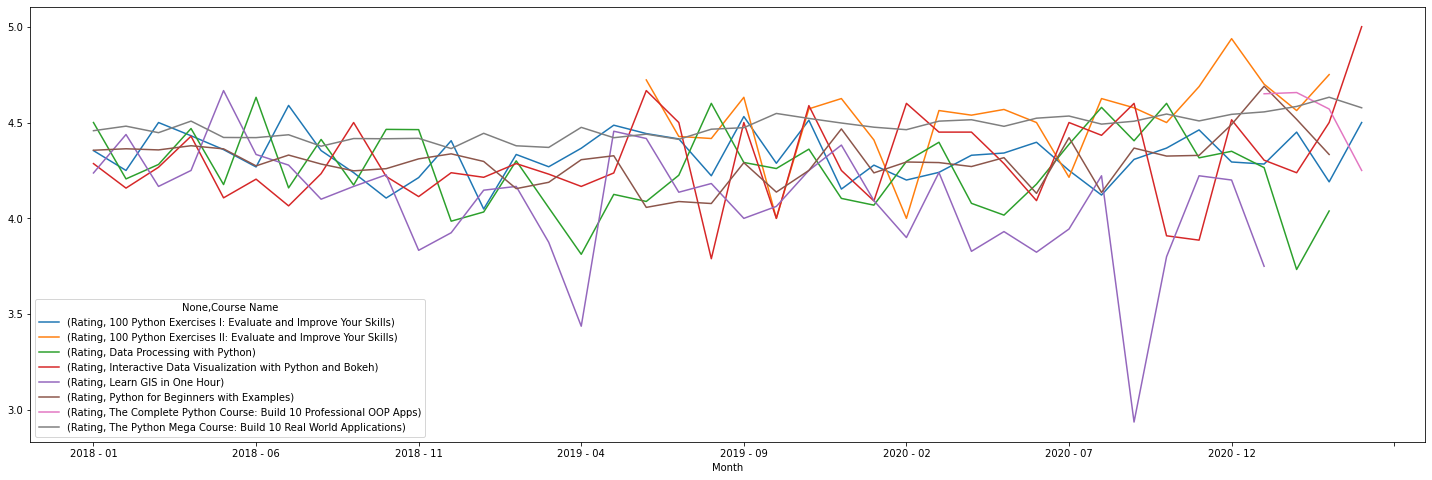

In [9]:
data['Month']=data['Timestamp'].dt.strftime('%Y - %m')
month_average_crs=data.groupby(['Month','Course Name']).mean().unstack()
#mean() ignores timestamps and nonnumeric columns 
#but count() doesn't ignore them that is what makes the graph not readable.
#so thats what gives us so much data
#but you can choose a particular column to make it focus that column 
#and which makes the plot readable like 'Rating'.
month_average_crs.plot(figsize=[25,8])
#lets use plot to show the data and the question what columns should we assign to the x as y is set as month
# To unstack the data frame and show it as pivot table so to say use'unstack()' method

## What day of the week are people the happiest

In [17]:
data['Weekday']=data['Timestamp'].dt.strftime('%A')
data['Daynumber']=data['Timestamp'].dt.strftime('%w')
#the name of the day of the week can be extracted using '%A'
data

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021 - 13,2021 - 04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021 - 13,2021 - 04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021 - 13,2021 - 04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021 - 13,2021 - 04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021 - 13,2021 - 04,Friday,5
...,...,...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018 - 00,2018 - 01,Monday,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018 - 00,2018 - 01,Monday,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018 - 00,2018 - 01,Monday,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018 - 00,2018 - 01,Monday,1


In [16]:
weekday_average=data.groupby(['Weekday','Daynumber']).mean()
weekday_average=weekday_average.sort_values('Daynumber')
weekday_average
#Daynumber is used to sort the weekdays.

,,Rating
Weekday,Daynumber,
Sunday,0,4.439097
Monday,1,4.449335
Tuesday,2,4.446240
Wednesday,3,4.427452
Thursday,4,4.437880
Friday,5,4.455207
Saturday,6,4.440274


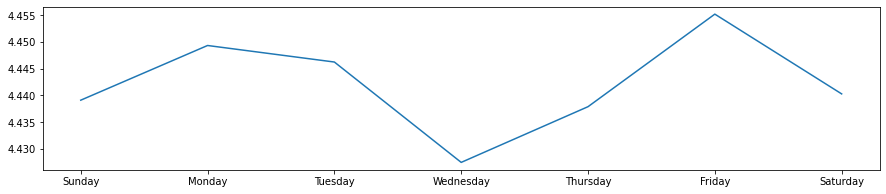

In [23]:
plt.figure(figsize=[15, 3])
plt.plot(weekday_average.index.get_level_values(0),weekday_average['Rating'])
#just change the plot into box if you want box graph. or if you want to change graph.
#'the get_level_values' is used in multi index situations to get a particular column in index to plot as 'x'.

## Different type of Plots like('Box','plot','Pie')

### Number of Ratings by course

In [28]:
share=data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x2afb7fdd4e0>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

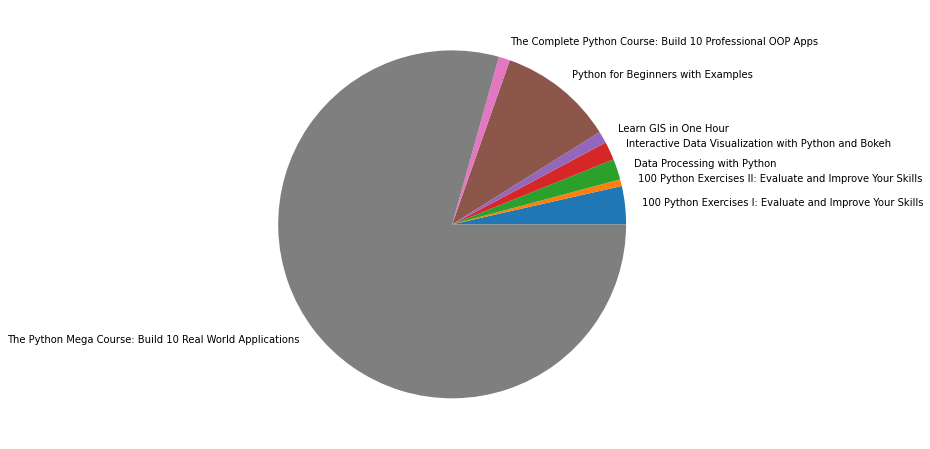

In [30]:
#pie chart.
plt.figure(figsize=[25,8])
plt.pie(share,labels=share.index)
